In [1]:
from google.colab import drive

In [2]:
drive.mount("/content/gdrive")

Mounted at /content/gdrive


**Project Description - COVID-19 Image Classicication.¶**

***Data Description:***
We are provided with a training set and a test set of images of 3 classes. Each image has a filename that is its unique id. The dataset comprises 3 classes: COVID-19, Viral Pneumonia, and Normal. The goal of the project is to create a classifier capable of determining the class of the X-ray image

***Dataset:***
The project is inspired from a dataset from Kaggle. Note: For project purposes, the dataset is modified according to the learning requirements. You are provided with the following files: testimage.npy testLabels.csv trainimage.npy trainLabels.csv The dataset (above 4 files) has to be downloaded from Olympus platform of Great Learning.

***Objective:***
To implement the techniques learnt as a part of the course with Learning Outcomes: Pre-processing of image data. Visualization of images. Building CNN. Evaluate the Model.

In [3]:
# Import necessary libraries.
import cv2
import math
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from tensorflow.keras import models, layers
from tensorflow.keras.optimizers import RMSprop, Adam
from keras.utils.np_utils import to_categorical # convert to one-hot-encoding

In [4]:
# Load the image file of dataset
testimages = np.load ('/content/gdrive/MyDrive/DLCP/covid-19-dataset/testimage.npy')
trainimages = np.load ('/content/gdrive/MyDrive/DLCP/covid-19-dataset/trainimage.npy')

# Load the labels file of dataset
testlabels = pd.read_csv ('/content/gdrive/MyDrive/DLCP/covid-19-dataset/testLabels.csv')
trainlabels = pd.read_csv ('/content/gdrive/MyDrive/DLCP/covid-19-dataset/trainLabels.csv')

In [5]:
# Print Datasets shape
print (" Test images Shape", testimages.shape,'\n')
print (" Test Labels Shape", testlabels.shape, '\n')

print (" Train images Shape", trainimages.shape,'\n')
print (" Train Labels Shape", trainlabels.shape, '\n')

 Test images Shape (66, 128, 128, 3) 

 Test Labels Shape (66, 1) 

 Train images Shape (251, 128, 128, 3) 

 Train Labels Shape (251, 1) 



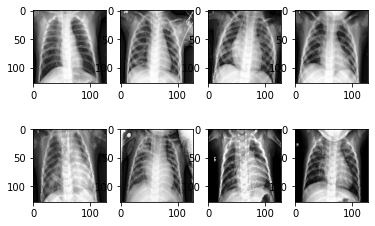

In [6]:
# Show Some Test Images 
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(testimages[i])

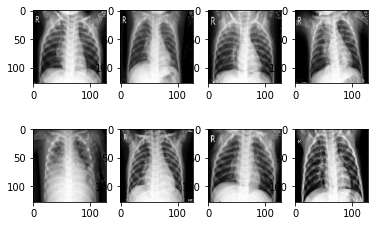

In [7]:
# Show Some train Images 
for i in range(8):
    plt.subplot(2, 4, i + 1)
    plt.imshow(trainimages[i])

# Apply image processing on the images:

- Gaussian Blurring.
- Normalization.
- Visualize data after pre-processing.

#### Apply blurring filters to  image?

1. Every image is associated with noise. Noise is the pixel brightening because ofthe dark current i.e. the current generated not by the photons but othermechanisms
2. These unwanted specks of brightness can hamper the processing down the line
3. Like in any conventional algorithms, we do not want our models to get influencedby noise!
4. The gaussian blurring and other filters act like erasers on the noisy pixels by re-calculating their pixel values based on neighbor pixels!
5. Hopefully, after this step, the digital image will have only the object of interest(the real signal or function) that we wish to work onImage processing (Gaussian Blurring)Proprietary content


In [8]:
plt.figure(figsize=(16,10))

preprocessed_testimages = []       # Initialize empty list to store the images after pre-processing.

for img in testimages:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)
    preprocessed_testimages.append(blurImg)                   # Append image 
    


<Figure size 1152x720 with 0 Axes>

In [9]:
plt.figure(figsize=(16,10))

preprocessed_trainimages = []       # Initialize empty list to store the images after pre-processing.

for img in trainimages:
    # Use gaussian blur
    blurImg = cv2.GaussianBlur(img, (5, 5), 0)
    preprocessed_trainimages.append(blurImg)             # Append image 
    
    # Show examples

<Figure size 1152x720 with 0 Axes>

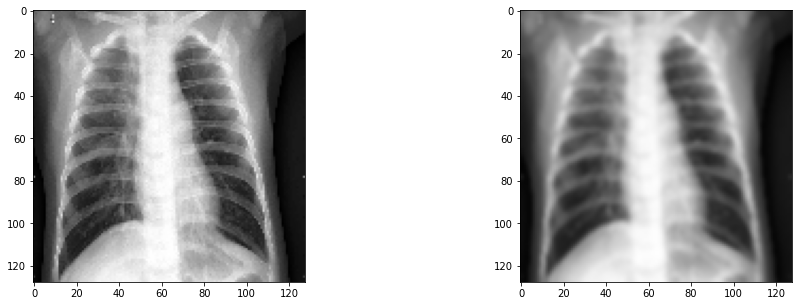

In [10]:
# Display Images
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1); plt.imshow(testimages[0])         # Show the original image
plt.subplot(1, 2, 2); plt.imshow(preprocessed_testimages[0])     # Blur image

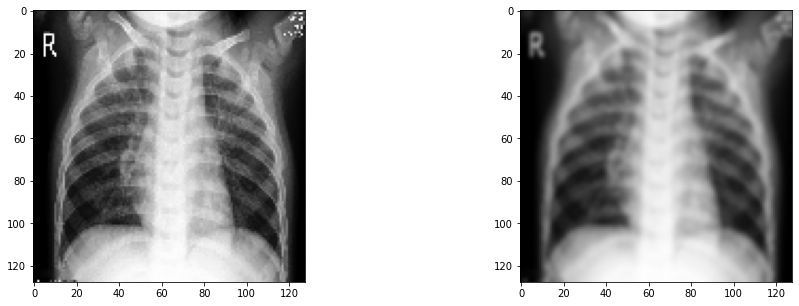

In [11]:
plt.figure(figsize=(16,5))
plt.subplot(1, 2, 1); plt.imshow(trainimages[0])         # Show the original image
plt.subplot(1, 2, 2); plt.imshow(preprocessed_trainimages[0])     # Blur image

In [12]:
preprocessed_testimages = np.asarray(preprocessed_testimages)    # Convert to numpy array.

In [13]:
preprocessed_trainimages = np.asarray(preprocessed_trainimages)    # Convert to numpy array.

In [14]:
len(preprocessed_testimages), len(testimages)

(66, 66)

In [15]:
len(preprocessed_trainimages), len(trainimages)

(251, 251)

In [16]:
# Normalize image data.
preprocessed_testimages = preprocessed_testimages/ 255

In [17]:
preprocessed_trainimages = preprocessed_trainimages/ 255

In [18]:
preprocessed_testimages[0].shape, testimages[0].shape

((128, 128, 3), (128, 128, 3))

In [19]:
preprocessed_trainimages[0].shape, trainimages[0].shape

((128, 128, 3), (128, 128, 3))

Preparation of data for compatability , steps to take:¶
- Convert labels from digits to one hot vectors.
- Print the label for y_train[0].
- Check the shape of data, Reshape data into shapes compatible with Keras - models, if already not compatible.

In [77]:
testlabels

,Label
0,Viral Pneumonia
1,Viral Pneumonia
2,Viral Pneumonia
3,Viral Pneumonia
4,Viral Pneumonia
...,...
61,Normal
62,Normal
63,Normal
64,Normal


In [20]:
# Convert labels from digits to one hot vectors.

from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y1 = enc.fit_transform(testlabels)  # Test Labels

In [21]:
y2 = enc.fit_transform(trainlabels)   # Train Labels

In [22]:
y1[0]

array([0, 0, 1])

In [24]:
y1.shape

(66, 3)

In [23]:
y2[0]

array([0, 0, 1])

In [25]:
y2.shape

(251, 3)

In [26]:
preprocessed_trainimages.shape

(251, 128, 128, 3)

In [28]:
preprocessed_testimages.shape

(66, 128, 128, 3)

In [29]:
X_train = preprocessed_trainimages
X_test = preprocessed_testimages
y_train = y2
y_test = y1

In [30]:
print (X_train.shape)
print (y_train.shape)
print (X_test.shape)
print (y_test.shape)

(251, 128, 128, 3)
(251, 3)
(66, 128, 128, 3)
(66, 3)


In [31]:
# Reshape data into shapes compatible with Keras models.

X_train = X_train.reshape(X_train.shape[0], 128, 128, 3)
X_test = X_test.reshape(X_test.shape[0], 128, 128, 3)


In [32]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(251, 128, 128, 3)
(251, 3)
(66, 128, 128, 3)
(66, 3)


In [33]:
from sklearn.model_selection import train_test_split

X_test, X_val, y_test, Y_val = train_test_split(X_test, y_test, test_size = 0.5, random_state=2)

In [34]:
print(X_test.shape)
print(X_val.shape)

(33, 128, 128, 3)
(33, 128, 128, 3)


# Building CNN:

In [35]:
# Set the CNN model

model = models.Sequential()
model.add(layers.Conv2D(32, (5, 5), padding='same', activation="relu", input_shape=(128, 128, 3)))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.2))
model.add(layers.Conv2D(64, (5, 5), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.3))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.4))
model.add(layers.Conv2D(64, (3, 3), padding='same', activation="relu"))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.GlobalMaxPooling2D())
model.add(layers.Dense(256, activation="relu"))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(12, activation="softmax"))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 128, 128, 32)      2432      
_________________________________________________________________
batch_normalization (BatchNo (None, 128, 128, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 64, 64, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 64, 64, 64)        51264     
_________________________________________________________________
batch_normalization_1 (Batch (None, 64, 64, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 32, 32, 64)        0

In [36]:
# Set the optimizer and loss function, and compile the model with them.

optimizer = Adam(
                  learning_rate=0.001,
                  beta_1=0.9,
                  beta_2=0.999,
                  epsilon=1e-07,
                  amsgrad=False,
                  name='Adam')
model.compile(optimizer = optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

In [41]:
# Set epochs = 20, and fit the model. 
history = model.fit(X_train, y_test, epochs = 20, validation_data = (X_val,Y_val),batch_size = None)

ValueError: ignored

Not sure makeing some mistake on the Matrix dimensions matchup in the model building